# Series de tiempo

<p style='text-align: justify;'>Usaremos las series de tiempo para predecir el cierre de una acción en la bolsa de valores mexicana.
Podemos pensar en las series de tiempo como secuencias de datos que miden la misma cosa sobre un periodo de tiempo, podemos imaginarlo como un conjunto de datos que tiene una fecha y/o hora en la cual cada registro fue creado.
Este tipo de conjunto de datos crece constantemente, tenemos bolsas de valores que están constantemente registrando los costos, existen casas inteligentes que crean series de tiempo con la temperatura del hogar, energía entre otras medidas.</p>

<p style='text-align: justify;'>Por lo general, en las series de tiempo cada que un dato nuevo se genera, este se anexa a la serie existente. Los datos ya guardados no pueden ser modificados pues es un evento en el pasado. Además, los datos llegan ordenados por el tiempo asociado a cada registro. Podrás imaginar que el tiempo es el eje principal para este tipo de conjunto de datos.</p>

<p style='text-align: justify;'>Poder medir los sistemas presentes y guardar esa información en series de tiempo nos permite analizar el pasado, monitorear el presente y predecir el futuro.</p>

Cualquier serie de tiempo se puede describir en 4 componentes básicos:
- Nivel. El valor de referencia para la serie si fuera una línea recta.
- Tendencia. El aumento o disminución de la serie a lo largo del tiempo.
- Estacionalidad. Los patrones o ciclos a lo largo del tiempo.
- Ruido. La variabilidad en las observaciones.

Como realizar predicciones:
- Métodos Clásicos (ARIMA)
- Métodos de Machine Learning

# Series de tiempo en la bolsa de valores

https://finance.yahoo.com/quote/CEMEXCPO.MX

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
df = pd.read_csv("./data/finance/CEMEXCPO.MX.csv")

In [6]:
# %matplotlib notebook
%matplotlib inline

In [7]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-01-03,8.97564,9.09396,8.70519,8.78970,1.790444,8140435.0
1,2000-01-04,8.45164,8.48544,8.18118,8.18118,1.666490,24190581.0
2,2000-01-05,8.18964,8.28260,8.01215,8.21499,1.673377,36945507.0
3,2000-01-06,8.23189,8.29106,7.99525,8.07976,1.645831,13890801.0
4,2000-01-07,8.11357,8.16428,8.04596,8.16428,1.663048,43027169.0


In [8]:
df.dtypes
#vemos que el campo Date lo entiende como objeto no como tipo fecha asi que lo transformamos

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume       float64
dtype: object

In [9]:
df.Date = pd.to_datetime(df.Date) #lo cambiamos a tipo fecha
df.index = df.Date

In [11]:
df.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume              float64
dtype: object

In [12]:
df = df.set_index('Date').asfreq('d') #'d' es frecuencia diaria que es el caso de la bolsa
df.head(10) #pero vemos vacios del fin de semana, hemos de quitarles

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-03,8.97564,9.09396,8.70519,8.78970,1.790444,8140435.0
2000-01-04,8.45164,8.48544,8.18118,8.18118,1.666490,24190581.0
2000-01-05,8.18964,8.28260,8.01215,8.21499,1.673377,36945507.0
2000-01-06,8.23189,8.29106,7.99525,8.07976,1.645831,13890801.0
2000-01-07,8.11357,8.16428,8.04596,8.16428,1.663048,43027169.0
2000-01-08,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-09,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-10,8.28260,8.36712,8.11357,8.33331,1.697479,18132583.0
2000-01-11,8.26570,8.35022,8.11357,8.13893,1.657884,22208716.0


In [13]:
df = df.fillna(method="ffill") #el valor vacio rellenalo con el valor anterior
df.head(10)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-03,8.97564,9.09396,8.70519,8.78970,1.790444,8140435.0
2000-01-04,8.45164,8.48544,8.18118,8.18118,1.666490,24190581.0
2000-01-05,8.18964,8.28260,8.01215,8.21499,1.673377,36945507.0
2000-01-06,8.23189,8.29106,7.99525,8.07976,1.645831,13890801.0
2000-01-07,8.11357,8.16428,8.04596,8.16428,1.663048,43027169.0
2000-01-08,8.11357,8.16428,8.04596,8.16428,1.663048,43027169.0
2000-01-09,8.11357,8.16428,8.04596,8.16428,1.663048,43027169.0
2000-01-10,8.28260,8.36712,8.11357,8.33331,1.697479,18132583.0
2000-01-11,8.26570,8.35022,8.11357,8.13893,1.657884,22208716.0


In [15]:
df = df["2016-06":"2018-06"] #para consultar registros de una fecha dada
df.head(10)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-06-01,11.2981,11.2981,11.1154,11.2308,11.096912,71088059.0
2016-06-02,11.2019,11.3654,11.0192,11.1250,10.992373,35763530.0
2016-06-03,11.1827,11.5192,11.0192,11.4135,11.277434,78814722.0
2016-06-04,11.1827,11.5192,11.0192,11.4135,11.277434,78814722.0
2016-06-05,11.1827,11.5192,11.0192,11.4135,11.277434,78814722.0
2016-06-06,11.4904,11.5865,11.2885,11.3654,11.229908,52093627.0
2016-06-07,11.4135,11.7019,11.3750,11.5962,11.457956,60660532.0
2016-06-08,11.6346,12.1154,11.6346,11.9423,11.799931,60365302.0
2016-06-09,11.9038,11.9038,11.5385,11.5769,11.438886,47852537.0


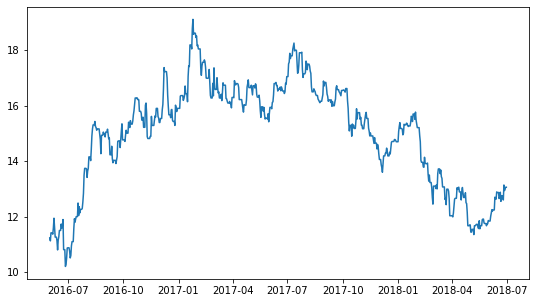

In [16]:
#dibujamos la info que tenemos antes de la predicción
import pandas.plotting._converter as pandacnv
pandacnv.register()
plt.figure(figsize=(9,5))
plt.plot(df.Close);

# Haciendo predicciones a futuro
Supongamos que queremos hacer una predicción del día de mañana (actual valor a predecir). Si solo tenemos la fecha como referencia difícilmente podremos dar un pronóstico acertado pues nos falta conocer cómo se ha comportado hasta el momento la serie. Es ahí donde utilizamos ventanas deslizantes de tiempo o simplemente ventanas de tiempo, estas nos permiten crear variables artificiales las cuales nos describen el comportamiento de los días anteriores.

Esto a su ves nos permite resolver el problema de prediccion con aprendizaje supervisado donde las variables X (descripciones de la ventana) nos permite predecir una variable Y (el valor actual de cierre).
<center><img src="img/ts.png" width = "60%"></center>

In [17]:
import seaborn as sns
import numpy as np
test_size = 60 #cuantos datos a futuro queremos
window_size = 3 #cuantos elementos quiero que considere antes de la predicción

In [18]:
df_shift = df.Close.shift(1) #nos movemos un dia
df_mean_roll = df_shift.rolling(window_size).mean()
df_std_roll = df_shift.rolling(window_size).std()
df_mean_roll.name = "mean_roll"
df_std_roll.name = "std_roll"

#cambiamos los indices para que se alineen en el dataframe
df_mean_roll.index = df.index
df_std_roll.index = df.index

In [19]:
df_shift.head(),df_mean_roll.head(),df_std_roll.head()
#como nos basamos en los 3 dias anteriores para hacer la precidicción, no puede hacer las 3 primeras predicciones

(Date
 2016-06-01        NaN
 2016-06-02    11.2308
 2016-06-03    11.1250
 2016-06-04    11.4135
 2016-06-05    11.4135
 Freq: D, Name: Close, dtype: float64, Date
 2016-06-01          NaN
 2016-06-02          NaN
 2016-06-03          NaN
 2016-06-04    11.256433
 2016-06-05    11.317333
 Freq: D, Name: mean_roll, dtype: float64, Date
 2016-06-01         NaN
 2016-06-02         NaN
 2016-06-03         NaN
 2016-06-04    0.145948
 2016-06-05    0.166566
 Freq: D, Name: std_roll, dtype: float64)

In [20]:
#unimos la serie predicha con la original
df_w = pd.concat([df.Close,df_mean_roll,df_std_roll],axis=1)
df_w.head(10)

,Close,mean_roll,std_roll
Date,,,
2016-06-01,11.2308,NaN,NaN
2016-06-02,11.1250,NaN,NaN
2016-06-03,11.4135,NaN,NaN
2016-06-04,11.4135,11.256433,1.459482e-01
2016-06-05,11.4135,11.317333,1.665656e-01
2016-06-06,11.3654,11.413500,1.178040e-08
2016-06-07,11.5962,11.397467,2.777055e-02
2016-06-08,11.9423,11.458367,1.217659e-01
2016-06-09,11.5769,11.634633,2.903640e-01


In [21]:
df_w = df_w[window_size:] #guarda todo menos los 3 primeros en df_w
df_w.head()

,Close,mean_roll,std_roll
Date,,,
2016-06-04,11.4135,11.256433,1.459482e-01
2016-06-05,11.4135,11.317333,1.665656e-01
2016-06-06,11.3654,11.413500,1.178040e-08
2016-06-07,11.5962,11.397467,2.777055e-02
2016-06-08,11.9423,11.458367,1.217659e-01


In [22]:
test = df_w[-test_size:] #testea con los datos predichos
train = df_w[:-test_size] #entrenate con los datos que sabemos
X_test = test.drop("Close",axis = 1)
y_test = test["Close"] #nos interesa que haga predicción del valor de cierre de la bolsa 
X_train = train.drop("Close",axis = 1)
y_train = train["Close"]

In [23]:
from sklearn.svm import SVR
clf = SVR(gamma="scale")
clf.fit(X_train, y_train)
y_train_hat = pd.Series(clf.predict(X_train),index=y_train.index)
y_test_hat = pd.Series(clf.predict(X_test),index=y_test.index)

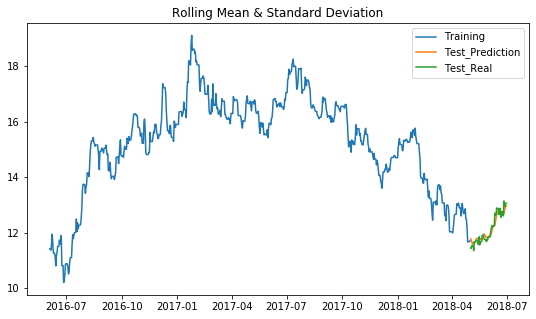

In [24]:
plt.figure(figsize=(9,5))
plt.plot(y_train ,label='Training')
plt.plot(y_test_hat,label='Test_Prediction')
plt.plot(y_test , label='Test_Real')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation');

In [25]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_test_hat)
print('MSE: {}'.format(mse))

MSE: 0.025163154752358308


<IPython.core.display.Javascript object>


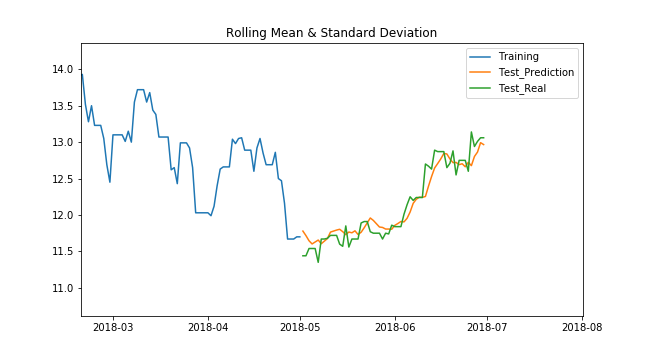

In [28]:
%matplotlib notebook #asi podemos tener zoom y mas detalles

plt.figure(figsize=(9,5))
plt.plot(y_train ,label='Training')
plt.plot(y_test_hat,label='Test_Prediction')
plt.plot(y_test , label='Test_Real')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation');